In [4]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [5]:
class BatsmanState(TypedDict):
  runs :int
  balls :int
  fours:int
  sixer:int

  sr:float
  bpb:float
  boundary_percentage:float
  summary:str

In [6]:
def calculate_sr(state: BatsmanState):
  sr= (state['runs']/state['balls'])*100
  return {'sr':sr}

In [13]:
def calculate_bpb(state: BatsmanState):
  bpb= (state['balls']/(state['fours']+state['sixer']))
  return {'bpb':bpb}

In [14]:
def calculate_boundary_percentage(state: BatsmanState):
  boundary_percentage= (((state['fours'] *4) + (state['sixer'] *6))/state['runs'])*100
  return {'boundary_percentage':boundary_percentage}

In [15]:
def summary(state: BatsmanState):
   summary= f"""
  strike Rate: {state['sr']:.2f} \n
  Balls per Boundary: {state['bpb']:.2f} \n
  Boundary Percentage: {state['boundary_percentage']:.2f} %
"""
   return {'summary':summary}

In [16]:
graph= StateGraph(BatsmanState)

graph.add_node("calculate_sr", calculate_sr)
graph.add_node("calculate_bpb", calculate_bpb)
graph.add_node("calculate_boundary_percentage", calculate_boundary_percentage)
graph.add_node("summary", summary)

#edges 
graph.add_edge(START, "calculate_sr")
graph.add_edge(START, "calculate_bpb")
graph.add_edge(START, "calculate_boundary_percentage")
graph.add_edge("calculate_sr", "summary")
graph.add_edge("calculate_bpb", "summary")
graph.add_edge("calculate_boundary_percentage", "summary")
graph.add_edge("summary", END)

workflow= graph.compile()

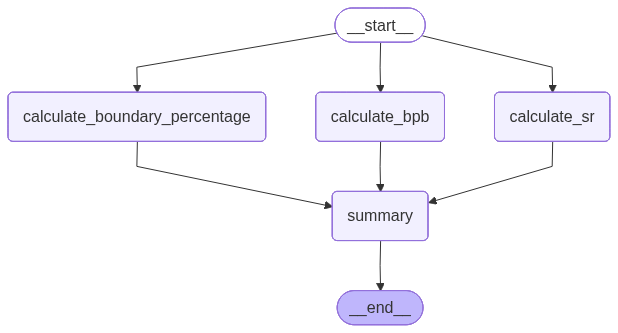

In [17]:
workflow

In [20]:
intial_state={
  "runs": 100,
  "balls":50,
  "fours":6,
  "sixer":4
  }

workflow.invoke(intial_state)  

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixer': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_percentage': 48.0,
 'summary': '\n  strike Rate: 200.00 \n\n  Balls per Boundary: 5.00 \n\n  Boundary Percentage: 48.00 %\n'}